<a id='top'></a>
# Tavakaiv
An Exploration of the Pikes Peak Ascent and Marathon  
CSCI 4022 Advanced Data Science  
Fall 2019  
Mark Ivlev and Spencer Wegner

Links:  
[Data Cleaning](#data-cleaning) | 
[Clustering](#clustering)  |
[Preliminary Analysis](#prelim) |
[Exploratory Data Analysis](#eda)

<a id='data-cleaning'></a>
[Back to Top](#top)
### Data Cleaning

#### Notes:
- Construct linear model - average time vs age groups for both genders

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/Users/spencerwegner/Documents/School/4th Year/fall-2019/csci-4022-data-science/project/tavakaiv/pikes_peak_results.csv")
#df = pd.read_csv("/Users/Mark Ivlev/Documents/GitHub/tavakaiv/pikes_peak_results.csv")
# drop name information
df=df.drop(columns='First')
df=df.drop(columns='Mi')
df=df.drop(columns='Last')

In [3]:
# update column types (convert times to strings for next step)
df = df.astype({'Pos': 'float', 'Div': 'str', 'Mpos': 'float', 'Mdiv': 'str', 'Sex': 'str', 'Age': 'float', \
                'Grp': 'str', 'City': 'str', 'State': 'str', 'NNup': 'str', 'BCupSplit': 'str', 'BCup': 'str', \
                'AFupSplit': 'str', 'AFup': 'str', 'AscSplit': 'str', 'Asc': 'str', 'AFdwnSplit': 'str', \
                'AFdwn': 'str', 'BCdwnSplit': 'str', 'BCdwn': 'str', 'NNdwnSplit': 'str', 'NNdwn': 'str', \
                'DwnSplit': 'str', 'Dwn': 'str', 'Mar': 'str', 'Race': 'str'})

In [4]:
# convert times (strings) to datetime type
df['NNup'] = pd.to_datetime(df['NNup'], format='%H:%M:%S')
df['BCupSplit'] = pd.to_datetime(df['BCupSplit'], format='%H:%M:%S')
df['BCup'] = pd.to_datetime(df['BCup'], format='%H:%M:%S')
df['AFupSplit'] = pd.to_datetime(df['AFupSplit'], format='%H:%M:%S')
df['AFup'] = pd.to_datetime(df['AFup'], format='%H:%M:%S')
df['AscSplit'] = pd.to_datetime(df['AscSplit'], format='%H:%M:%S')
df['Asc'] = pd.to_datetime(df['Asc'], format='%H:%M:%S')
df['AFdwnSplit'] = pd.to_datetime(df['AFdwnSplit'], format='%H:%M:%S')
df['AFdwn'] = pd.to_datetime(df['AFdwn'], format='%H:%M:%S')
df['BCdwnSplit'] = pd.to_datetime(df['BCdwnSplit'], format='%H:%M:%S')
df['BCdwn'] = pd.to_datetime(df['BCdwn'], format='%H:%M:%S')
df['NNdwnSplit'] = pd.to_datetime(df['NNdwnSplit'], format='%H:%M:%S')
df['NNdwn'] = pd.to_datetime(df['NNdwn'], format='%H:%M:%S')
df['DwnSplit'] = pd.to_datetime(df['DwnSplit'], format='%H:%M:%S')
df['Dwn'] = pd.to_datetime(df['Dwn'], format='%H:%M:%S')
df['Mar'] = pd.to_datetime(df['Mar'], format='%H:%M:%S')

In [5]:
# convert time to seconds
def time_seconds(hours, minutes, seconds):
    return 3600*hours + 60*minutes + seconds

# use lambda and apply to update time columns with seconds (takes a minute or so to run)
df['NNup'] = df.apply(lambda x: time_seconds(x['NNup'].hour, x['NNup'].minute, x['NNup'].second), axis=1)
df['BCupSplit'] = df.apply(lambda x: time_seconds(x['BCupSplit'].hour, x['BCupSplit'].minute, x['BCupSplit'].second), axis=1)
df['BCup'] = df.apply(lambda x: time_seconds(x['BCup'].hour, x['BCup'].minute, x['BCup'].second), axis=1)
df['AFupSplit'] = df.apply(lambda x: time_seconds(x['AFupSplit'].hour, x['AFupSplit'].minute, x['AFupSplit'].second), axis=1)
df['AFup'] = df.apply(lambda x: time_seconds(x['AFup'].hour, x['AFup'].minute, x['AFup'].second), axis=1)
df['AscSplit'] = df.apply(lambda x: time_seconds(x['AscSplit'].hour, x['AscSplit'].minute, x['AscSplit'].second), axis=1)
df['Asc'] = df.apply(lambda x: time_seconds(x['Asc'].hour, x['Asc'].minute, x['Asc'].second), axis=1)
df['AFdwnSplit'] = df.apply(lambda x: time_seconds(x['AFdwnSplit'].hour, x['AFdwnSplit'].minute, x['AFdwnSplit'].second), axis=1)
df['AFdwn'] = df.apply(lambda x: time_seconds(x['AFdwn'].hour, x['AFdwn'].minute, x['AFdwn'].second), axis=1)
df['BCdwnSplit'] = df.apply(lambda x: time_seconds(x['BCdwnSplit'].hour, x['BCdwnSplit'].minute, x['BCdwnSplit'].second), axis=1)
df['BCdwn'] = df.apply(lambda x: time_seconds(x['BCdwn'].hour, x['BCdwn'].minute, x['BCdwn'].second), axis=1)
df['NNdwnSplit'] = df.apply(lambda x: time_seconds(x['NNdwnSplit'].hour, x['NNdwnSplit'].minute, x['NNdwnSplit'].second), axis=1)
df['NNdwn'] = df.apply(lambda x: time_seconds(x['NNdwn'].hour, x['NNdwn'].minute, x['NNdwn'].second), axis=1)
df['DwnSplit'] = df.apply(lambda x: time_seconds(x['DwnSplit'].hour, x['DwnSplit'].minute, x['DwnSplit'].second), axis=1)
df['Dwn'] = df.apply(lambda x: time_seconds(x['Dwn'].hour, x['Dwn'].minute, x['Dwn'].second), axis=1)
df['Mar'] = df.apply(lambda x: time_seconds(x['Mar'].hour, x['Mar'].minute, x['Mar'].second), axis=1)

In [6]:
df.head() # DataFrame with both ascent and marathon racers

,ID,Pos,Div,Mpos,Mdiv,PPs,Sex,Age,Grp,City,...,AFdwn,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year
0,79698,410.0,67/77,NaN,nan,1,F,34.0,30-34,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2011
1,110626,257.0,40/132,NaN,nan,1,M,34.0,30-34,LAKEWOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017
2,75566,891.0,86/102,NaN,nan,1,M,29.0,25-29,SAN ANTONIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009
3,70663,414.0,69/83,NaN,nan,2,F,39.0,35-39,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2007
4,74588,397.0,49/63,NaN,nan,2,F,41.0,40-44,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009


In [7]:
# list of values to drop from Div and Mdiv columns
drop_list = ['',' ','?','DNF','DNF-11m','DNF-12+','DNF-3','DNF-4m','DNF-7m','DNF-8m','DNF-<AF','DNF-<BC',\
             'DNF-<BP','DNF-<BR','DNF-<NN','DNF->AF','DNF->BC','DNF-AF','DNF-AF+','DNF-BC','DNF-BC+',\
             'DNF-BP','DNF-BR','DNF-COG','DNF-CQ','DNF-FX','DNF-HR','DNF-INC','DNF-IO','DNF-NN','DNF-NN+',\
             'DNF-OCO','DNF-OCT','DNF-R','DNF-RX','DNF-SMK','DNF-ST','DNF-TMS','DNF-TOP','DNF-Top','DNF-UR',\
             'DNF-WET','DNF-Ws','DQ','DQ-AF','DQ-BC','DQ-SWAP','DQ-US','DQ-WAVE','DQ-Wave','DQed','nan']

In [8]:
# drop age group 1-15, any values from 'drop_list' in Div and Mdiv (placement) columns
for index, row in df.iterrows():
    if row['Grp'] == '01-15':
        df.drop(index, inplace=True)
    elif row['Race'] == 'A' and row['Div'] in drop_list:
        df.drop(index, inplace=True)
    elif row['Race'] == 'M' and row['Mdiv'] in drop_list:
        df.drop(index, inplace=True)

In [9]:
# create dataframe for ascent races
dfA = df[df.Race=='A']
dfA = dfA.drop(columns = ['AFdwnSplit', 'AFdwn', 'BCdwnSplit', 'BCdwn', 'NNdwnSplit', 'NNdwn', 'DwnSplit', \
                         'Dwn', 'Mar', 'Mpos', 'Mdiv'])
# create dataframe for marathon races
dfM = df[df.Race=='M']
dfM = dfM.drop(columns = ['Pos', 'Div'])

In [10]:
# take first part of placement before '/'
def parse_div(div):
    return div.split('/')[0]

In [11]:
# add columns for age group placement from first part of Div/Mdiv columns
dfA['Div_place'] = dfA.apply(lambda x: parse_div(x['Div']), axis=1)
dfM['Mdiv_place'] = dfM.apply(lambda x: parse_div(x['Mdiv']), axis=1)

In [12]:
dfA.head() # DF with only ascent racers

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place
0,79698,410.0,67/77,1,F,34.0,30-34,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19868.0,A,2011,67
1,110626,257.0,40/132,1,M,34.0,30-34,LAKEWOOD,CO,NaN,NaN,6734.0,3123.0,9857.0,4379.0,14236.0,A,2017,40
2,75566,891.0,86/102,1,M,29.0,25-29,SAN ANTONIO,TX,NaN,NaN,NaN,NaN,NaN,NaN,17868.0,A,2009,86
3,70663,414.0,69/83,2,F,39.0,35-39,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,20781.0,A,2007,69
4,74588,397.0,49/63,2,F,41.0,40-44,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19931.0,A,2009,49


In [13]:
dfM.head() # DF with only marathon racers

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place
12,111562,170.0,15/17,3,F,55.0,55-59,COLORADO SPRING,CO,5555.0,...,NaN,28728.0,NaN,NaN,NaN,13485.0,35225.0,M,2017,15
13,79048,402.0,51/70,1,M,52.0,50-54,CORAL SPRINGS,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,11036.0,29031.0,M,2010,51
19,44930,164.0,54/101,3,M,31.0,30-34,AUSTIN,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,7095.0,19276.0,M,1981,54
20,48926,197.0,56/108,3,M,32.0,30-34,WESTFORD,MA,NaN,...,NaN,NaN,NaN,NaN,NaN,7585.0,20372.0,M,1982,56
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1230.0,12965.0,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3


<a id='clustering'></a>
### Clustering

In [14]:
# Ascent
# add score column to dfM
dfA['ag_score'] = np.nan
dfA['g_score'] = np.nan

# compute age group score = fastest AG Asc time / Asc time (1 for first in AG)
# compute gender score = fastest G Asc time / Asc time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Grp'] == ag) & (dfA['Sex'] == sex)]
            try:
                best_time = min(dfT['Asc'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Asc']
                dfA.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Sex'] == sex)]
        try:
            best_time = min(dfT['Asc'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Asc']
            dfA.loc[index, 'g_score'] = score

In [15]:
# Marathon
# add score column to dfM
dfM['ag_score'] = np.nan
dfM['g_score'] = np.nan

# compute age group score = fastest AG Mar time / Mar time (1 for first in AG)
# compute gender score = fastest G Mar time / Mar time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Grp'] == ag) & (dfM['Sex'] == sex)]
            try:
                best_time = min(dfT['Mar'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Mar']
                dfM.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Sex'] == sex)]
        try:
            best_time = min(dfT['Mar'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Mar']
            dfM.loc[index, 'g_score'] = score 

In [16]:
# drop NaN's in score column for ascent
for index, row in dfA.iterrows():
    if np.isnan(row['ag_score']):
        dfA.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfA.drop(index, inplace=True)

In [17]:
dfA = dfA.astype({'Div_place': 'float'})

In [18]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfA.iterrows():
    if row['ag_score'] == 1 and row['Div_place'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Pos'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue

In [19]:
# drop NaN's in score column for marathon
for index, row in dfM.iterrows():
    if np.isnan(row['ag_score']):
        dfM.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfM.drop(index, inplace=True)
    elif row['Mdiv_place'] == '': # extra case for empty string in 'Mdiv_place'
        dfM.drop(index, inplace=True)

In [20]:
dfM = dfM.astype({'Mdiv_place': 'float'})

In [21]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfM.iterrows():
    if row['ag_score'] == 1 and row['Mdiv_place'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Mpos'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue

#### K-Means

In [22]:
a1=np.array(dfA['ag_score'])
a2=np.array(dfA['g_score'])
A=np.vstack((a1, a2)).T    
    
kmeans = KMeans(n_clusters=5).fit_predict(A)
cents = KMeans(n_clusters=5).fit(A)
centers = cents.cluster_centers_

In [23]:
# identify which races are in the upper right ("best") cluster and create a new DataFrame
# cluster centers indices and kmeans/label output do not always line up
indices=[]
clstr_number=kmeans[5] # we know this row is definitely in the upper right cluster
for i in range(len(kmeans)):
    if kmeans[i]==clstr_number:
        indices.append(i)
dfBCA=dfA.iloc[indices].copy()

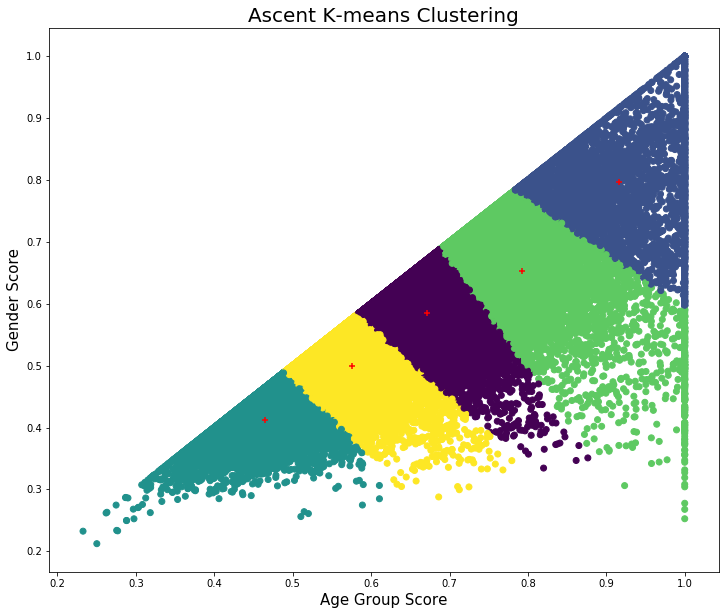

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in A], [x[1] for x in A], c=kmeans)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c='red', marker='+')
ax.set_title('Ascent K-means Clustering', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

In [25]:
m1=np.array(dfM['ag_score'])
m2=np.array(dfM['g_score'])
M=np.vstack((m1, m2)).T
    
kmeansM = KMeans(n_clusters=5).fit_predict(M)
centsM = KMeans(n_clusters=5).fit(M)
centersM = centsM.cluster_centers_

In [26]:
# identify races that are in the upper right cluster (same process as for ascent data above)
indices=[]
clstr_number=kmeansM[4]
for i in range(len(kmeansM)):
    if kmeansM[i]==clstr_number:
        indices.append(i)
dfBCM=dfM.iloc[indices].copy()

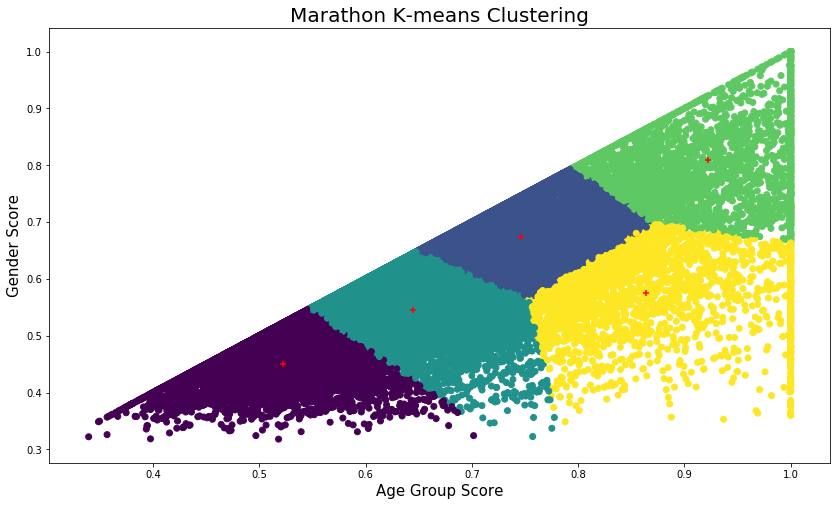

In [27]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
plt.scatter([x[0] for x in M], [x[1] for x in M], c=kmeansM)
plt.scatter([x[0] for x in centersM], [x[1] for x in centersM], c='red', marker='+')
ax.set_title('Marathon K-means Clustering', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

<a id='prelim'></a>
[Back to Top](#top)
### Preliminary Analysis

#### Data
The data set contains nearly 87,000 race results from 1956-2018. However, only races from 2012-2018 include data on split locations. So far we have dropped about 4,000 of the 87,000 rows due to missing data. We split the original DataFrame into two different DataFrames, one for the Ascent races and one for the Marathon races. We converted the split times from the hours:minutes:seconds format to seconds to make calculations easier.   

Instead of comparing the race times directly which would favor men and younger people, we added two score columns that represent how the runner did relative to their age group and how they did relative to their gender. For the age group score, we divided the best time in the age group by each runner's time so the runner who was first place in the age group got a score of 1 and other runners got a score less than 1. The same technique was used for the gender score.

#### Analysis

We chose to cluster the data to identify a group of races that are "successful", meaning they are run well for the age and gender of the runner. We do not merely want to choose the fastest times because that would bias successful races to men and younger people. For example, if the 10th place man was the same age as the first place man, the first place man obviously ran the race better. The 10th place man shouldn't be included just because his time is faster than the first place woman.  

We used K-means to cluster the race data based on the calculated gender and age group scores. This produced a group of races that are succesful (the upper right portion of the graph where both gender and age group score are close to 1). We chose K-means as the clustering algorithm so we can control the initialization of the clusters. This preliminary clustering gives us a group of races on which to perform a linear regression and perform further exploratory data analysis. This will allow us to determine if there is an optimal way to run the races. 

#### Pending Work
We will continue to play with the k-means initialization to see if we get different results. We need to do more data cleaning because we discovered there is missing data which inflates the age group scores of some runners incorrectly. Then we need to take the cluster of successful races and choose the races with split times and begin to analyze those. We will look at the percentage of time those runners are spending between all of the split locations to determine the optimal way to run the race.

<a id='eda'></a>
[Back to Top](#top)
### Exploratory Data Analysis

### Best Cluster

In [28]:
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfBCA_splits = dfBCA.loc[dfBCA['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfBCA_splits['NNup_pct'] = np.nan
dfBCA_splits['BCupSplit_pct'] = np.nan
dfBCA_splits['AFupSplit_pct'] = np.nan
dfBCA_splits['AscSplit_pct'] = np.nan

for index, row in dfBCA_splits.iterrows():
    dfBCA_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfBCA_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfBCA_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfBCA_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
# drop bad data
dfBCA_splits.drop(7110, inplace=True)
dfBCA_splits.drop(28557, inplace=True)

In [29]:
dfBCA_splits.loc[dfBCA_splits['AscSplit_pct'] > 0.4]['Asc']

63847    16127.0
Name: Asc, dtype: float64

In [30]:
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfBCM_splits = dfBCM.loc[dfBCM['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfBCM_splits['NNup_pct'] = np.nan
dfBCM_splits['BCupSplit_pct'] = np.nan
dfBCM_splits['AFupSplit_pct'] = np.nan
dfBCM_splits['AscSplit_pct'] = np.nan
dfBCM_splits['AFdwnSplit_pct'] = np.nan
dfBCM_splits['BCdwnSplit_pct'] = np.nan
dfBCM_splits['NNdwnSplit_pct'] = np.nan
dfBCM_splits['DwnSplit_pct'] = np.nan
dfBCM_splits['dwn_pct_asc'] = np.nan

for index, row in dfBCM_splits.iterrows():
    # uphill
    dfBCM_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfBCM_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfBCM_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfBCM_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
    # downhill
    dfBCM_splits.loc[index, 'AFdwnSplit_pct'] = row['AFdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'BCdwnSplit_pct'] = row['BCdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'NNdwnSplit_pct'] = row['NNdwnSplit']/row['Dwn']
    dfBCM_splits.loc[index, 'DwnSplit_pct'] = row['DwnSplit']/row['Dwn']
    # calculate the percentage of downhill time to the uphill time
    dfBCM_splits.loc[index, 'dwn_pct_asc'] = row['Dwn']/row['Asc']
# drop bad data
dfBCM_splits.drop(38, inplace=True)

In [31]:
dfBCM_splits.mean()

ID                104986.507886
Mpos                  18.719243
PPs                    7.192429
Age                   37.968454
NNup                3200.009615
BCupSplit           2408.368590
BCup                5628.116719
AFupSplit           2549.990536
AFup                8178.372240
AscSplit            3591.305994
Asc                11769.968454
AFdwnSplit          1964.819113
AFdwn              13744.805461
BCdwnSplit          1439.525597
BCdwn              15181.917722
NNdwnSplit          1629.921053
NNdwn              16811.567669
DwnSplit            1874.142857
Dwn                 6892.523659
Mar                18662.558360
Year                2015.097792
Mdiv_place             2.700315
ag_score               0.933960
g_score                0.805784
NNup_pct               0.273133
BCupSplit_pct          0.205333
AFupSplit_pct          0.216452
AscSplit_pct           0.304937
AFdwnSplit_pct         0.283702
BCdwnSplit_pct         0.207926
NNdwnSplit_pct         0.236361
DwnSplit

/Users/spencerwegner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/spencerwegner/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


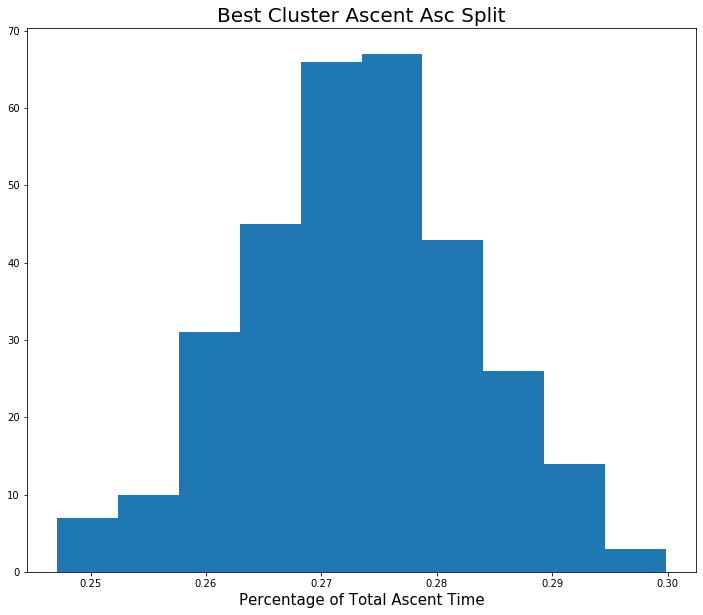

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.hist(dfBCM_splits['NNup_pct'])
ax.set_title('Best Cluster Ascent Asc Split', size=20)
plt.xlabel("Percentage of Total Ascent Time", size=15)
plt.show()

### All Clusters
NOTE: Still need to do Ascent for all clusters

In [33]:
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfA_splits = dfA.loc[dfA['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfA_splits['NNup_pct'] = np.nan
dfA_splits['BCupSplit_pct'] = np.nan
dfA_splits['AFupSplit_pct'] = np.nan
dfA_splits['AscSplit_pct'] = np.nan

for index, row in dfA_splits.iterrows():
    dfA_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfA_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfA_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfA_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
# drop bad data
#dfBCA_splits.drop(7110, inplace=True)
#dfBCA_splits.drop(28557, inplace=True)

In [34]:
dfA_splits

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,...,Asc,Race,Year,Div_place,ag_score,g_score,NNup_pct,BCupSplit_pct,AFupSplit_pct,AscSplit_pct
1,110626,257.0,40/132,1,M,34.0,30-34,LAKEWOOD,CO,NaN,...,14236.0,A,2017,40.0,0.540812,0.540812,NaN,NaN,0.219373,0.307600
5,102608,18.0,2/34,1,M,23.0,20-24,MARAVATÍO,MEX,2329.0,...,8740.0,A,2014,2.0,0.941419,0.892792,0.266476,0.200343,0.208810,0.324142
10,105023,537.0,59/69,3,F,53.0,50-54,COLORADO SPGS,CO,5611.0,...,21149.0,A,2015,59.0,0.582628,0.456003,0.265308,0.196983,0.223462,0.314247
17,111143,774.0,99/141,3,M,48.0,45-49,CARMEL,IN,NaN,...,18953.0,A,2017,99.0,0.549728,0.406215,NaN,NaN,NaN,1.000000
22,102655,65.0,17/164,3,M,31.0,30-34,BOULDER,CO,2756.0,...,10509.0,A,2014,17.0,0.759539,0.742506,0.262251,0.211343,0.227043,0.299172
23,105138,17.0,4/124,3,M,32.0,30-34,BOULDER,CO,2681.0,...,10081.0,A,2015,4.0,0.807658,0.807658,0.265946,0.202162,0.225176,0.306616
26,107568,439.0,72/116,1,F,37.0,35-39,LITTLETON,CO,5038.0,...,19084.0,A,2016,72.0,0.581377,0.486219,0.263991,0.195871,0.219294,0.320845
54,93081,676.0,99/130,19,M,39.0,35-39,FORT SMITH,AR,4520.0,...,16593.0,A,2013,99.0,0.516905,0.483638,0.272404,0.205629,0.225336,0.296511
57,103042,452.0,61/158,19,M,40.0,40-44,FORT SMITH,AR,3981.0,...,14593.0,A,2014,61.0,0.648256,0.534708,0.272802,0.202015,0.221133,0.303913
58,105296,175.0,28/153,19,M,41.0,40-44,FORT SMITH,AR,3517.0,...,13177.0,A,2015,28.0,0.754572,0.617895,0.266904,0.196479,0.216286,0.320179


In [35]:
# use .copy() to ensure a copy of dfBCA is made => avoid the SettingwithCopyWarning
dfM_splits = dfM.loc[dfM['Year'] >= 2013].copy()

# initialize new columns that represent the percentage of each split of the total race time
dfM_splits['NNup_pct'] = np.nan
dfM_splits['BCupSplit_pct'] = np.nan
dfM_splits['AFupSplit_pct'] = np.nan
dfM_splits['AscSplit_pct'] = np.nan
dfM_splits['AFdwnSplit_pct'] = np.nan
dfM_splits['BCdwnSplit_pct'] = np.nan
dfM_splits['NNdwnSplit_pct'] = np.nan
dfM_splits['DwnSplit_pct'] = np.nan
dfM_splits['dwn_pct_asc'] = np.nan

for index, row in dfM_splits.iterrows():
    # uphill
    dfM_splits.loc[index, 'NNup_pct'] = row['NNup']/row['Asc']
    dfM_splits.loc[index, 'BCupSplit_pct'] = row['BCupSplit']/row['Asc']
    dfM_splits.loc[index, 'AFupSplit_pct'] = row['AFupSplit']/row['Asc']
    dfM_splits.loc[index, 'AscSplit_pct'] = row['AscSplit']/row['Asc']
    # downhill
    dfM_splits.loc[index, 'AFdwnSplit_pct'] = row['AFdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'BCdwnSplit_pct'] = row['BCdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'NNdwnSplit_pct'] = row['NNdwnSplit']/row['Dwn']
    dfM_splits.loc[index, 'DwnSplit_pct'] = row['DwnSplit']/row['Dwn']
    # calculate the percentage of downhill time to the uphill time
    dfM_splits.loc[index, 'dwn_pct_asc'] = row['Dwn']/row['Asc']
# drop bad data
dfM_splits.drop(79335, inplace=True)
dfM_splits.drop(38, inplace=True)
dfM_splits.drop(6582, inplace=True)
dfM_splits.drop(26676, inplace=True)
dfM_splits.drop(31650, inplace=True)
dfM_splits.drop(66883, inplace=True)
dfM_splits.drop(49651, inplace=True)
dfM_splits.drop(51767, inplace=True)
dfM_splits.drop(5332, inplace=True)
dfM_splits.drop(44610, inplace=True)
dfM_splits.drop(51214, inplace=True)
dfM_splits.drop(56278, inplace=True)
dfM_splits.drop(70835, inplace=True)
dfM_splits.drop(78518, inplace=True)
dfM_splits.drop(7891, inplace=True)
dfM_splits.drop(24035, inplace=True)
dfM_splits.drop(27618, inplace=True)
dfM_splits.drop(29676, inplace=True)
dfM_splits.drop(37570, inplace=True)
dfM_splits.drop(40804, inplace=True)
dfM_splits.drop(65651, inplace=True)

for index, row in dfM_splits.iterrows():
    if row['Year'] == 2015 and (np.isnan(row['BCdwnSplit_pct']) or np.isnan(row['NNdwnSplit_pct'])):
        dfM_splits.drop(index, inplace=True)

In [36]:
dfM_splits.mean()

ID                106238.112847
Mpos                 214.265377
PPs                    6.194444
Age                   42.643513
NNup                4167.437940
BCupSplit           3166.841430
BCup                7335.545093
AFupSplit           3541.738202
AFup               10880.581845
AscSplit            5265.524306
Asc                16146.368552
AFdwnSplit          2995.175261
AFdwn              18873.797615
BCdwnSplit          2151.971746
BCdwn              21344.074463
NNdwnSplit          2235.561262
NNdwn              23097.137713
DwnSplit            2570.275759
Dwn                10180.678571
Mar                26327.127976
Year                2015.386657
Mdiv_place            27.541419
ag_score               0.680264
g_score                0.551723
NNup_pct               0.259745
BCupSplit_pct          0.197019
AFupSplit_pct          0.218957
AscSplit_pct           0.324251
AFdwnSplit_pct         0.297902
BCdwnSplit_pct         0.214761
NNdwnSplit_pct         0.227195
DwnSplit

In [72]:
dfM.head()

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place,ag_score,g_score
12,111562,170.0,15/17,3,F,55.0,55-59,COLORADO SPRING,CO,5555.0,...,NaN,NaN,NaN,13485.0,35225.0,M,2017,15.0,0.644968,0.475060
13,79048,402.0,51/70,1,M,52.0,50-54,CORAL SPRINGS,FL,NaN,...,NaN,NaN,NaN,11036.0,29031.0,M,2010,51.0,0.666701,0.478592
19,44930,164.0,54/101,3,M,31.0,30-34,AUSTIN,TX,NaN,...,NaN,NaN,NaN,7095.0,19276.0,M,1981,54.0,0.642094,0.642094
20,48926,197.0,56/108,3,M,32.0,30-34,WESTFORD,MA,NaN,...,NaN,NaN,NaN,7585.0,20372.0,M,1982,56.0,0.618152,0.618152
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3.0,0.850292,0.791403


In [74]:
np.sort(dfM.Age.unique())

array([16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 80., 81.,
       nan])

In [78]:
avg_time = []

for age in range(16,82):
    dfT = dfM.loc[dfM['Age'] == age]
    avg_time.append(dfT['Mar'].mean())

In [94]:
dfM.loc[dfM['Age']==81]

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place,ag_score,g_score
85217,79114,468.0,1/1,12,M,81.0,80-84,SULTAN,WA,NaN,...,NaN,NaN,NaN,15012.0,32750.0,M,2010,1.0,1.0,0.424244


In [88]:
times = dfM['Mar']
ages = dfM['Age']
best_times = dfBCM['Mar']
best_ages = dfBCM['Age']

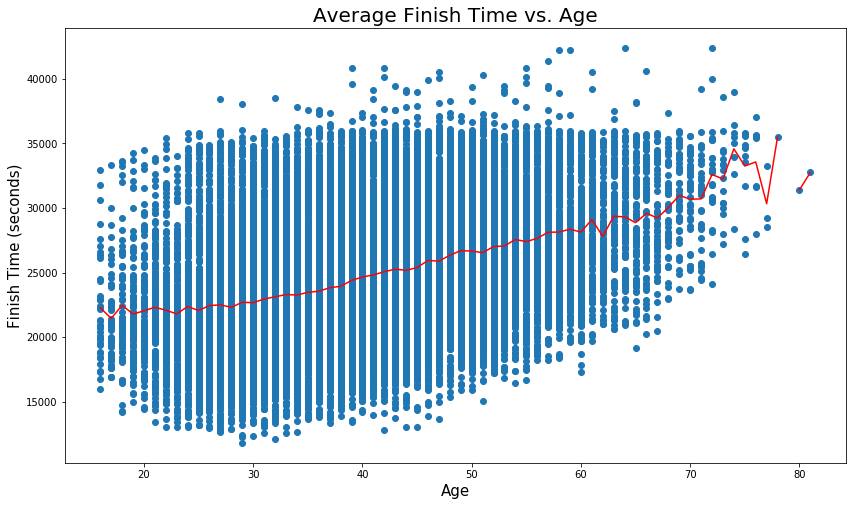

In [97]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

plt.scatter(ages, times)
plt.plot(np.arange(16,82), avg_time, color = 'red')
ax.set_title('Average Finish Time vs. Age', size=20)
plt.xlabel("Age", size=15)
plt.ylabel("Finish Time (seconds)", size=15)
plt.show()